In [1]:
!pip install pandas matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
def extrair_total_categoria(categoria):
    """ Extrai o total de veículos da categoria """
    match = re.search(r'\((\d+),', categoria)  
    return int(match.group(1)) if match else 0

In [ ]:
def extrair_quantidade_tipo(descricao):
    """ Extrai a quantidade de veículos do tipo específico """
    match = re.match(r'(\d+)', descricao)
    return int(match.group(1)) if match else 1  


In [ ]:
def processar_csv(filename):
    """ Processa um CSV e retorna um dicionário com as somas por categoria """
    df = pd.read_csv(filename)
    perdas_por_categoria = {}

    categorias_processadas = set()

    for _, row in df.iterrows():
        categoria = row["Category"]

       
        if categoria not in categorias_processadas:
            total_categoria = extrair_total_categoria(categoria)
            perdas_por_categoria[categoria] = total_categoria
            categorias_processadas.add(categoria)

    return perdas_por_categoria


In [ ]:
perdas_ucranianas = processar_csv("data/ukrainian_losses.csv")
perdas_russas = processar_csv("data/russian_losses.csv")

In [ ]:
categorias = set(perdas_ucranianas.keys()).union(set(perdas_russas.keys()))
dados = {"Category": list(categorias), 
         "Ukraine": [perdas_ucranianas.get(cat, 0) for cat in categorias],
         "Russia": [perdas_russas.get(cat, 0) for cat in categorias]}

df_resultado = pd.DataFrame(dados).sort_values(by="Ukraine", ascending=False)

C:\Users\josea\AppData\Local\Temp\ipykernel_1288\2791951075.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


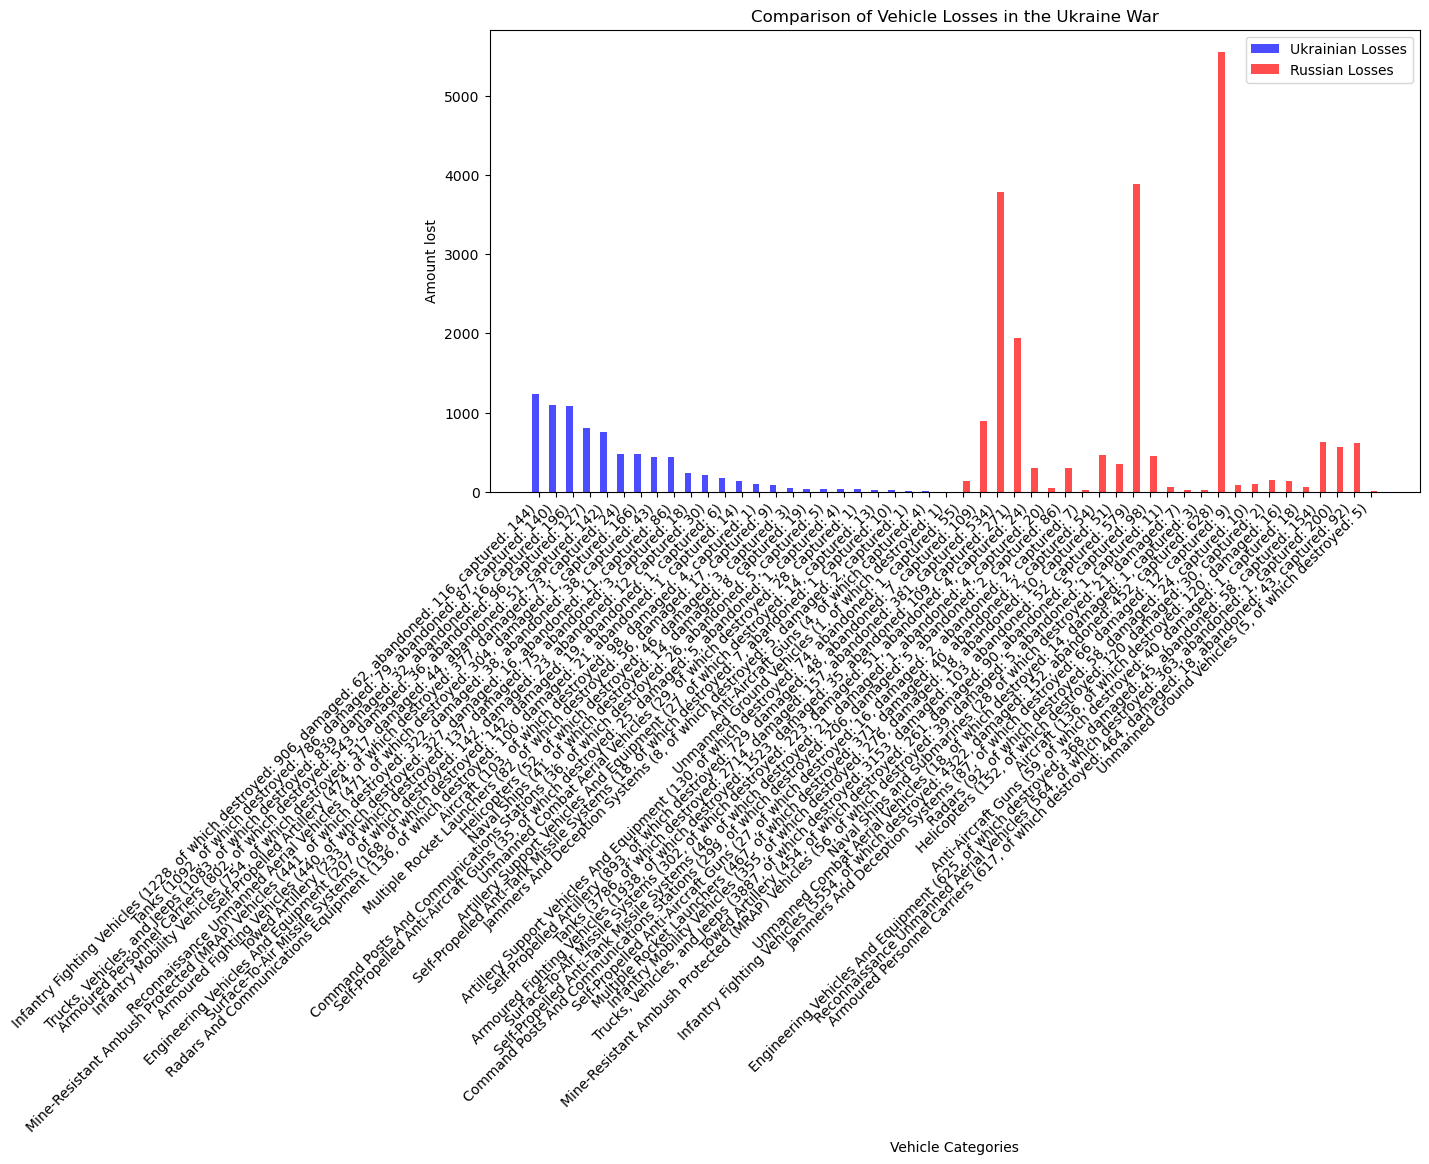

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(df_resultado))

plt.bar(x, df_resultado["Ukraine"], width=bar_width, label="Ukrainian Losses", color='blue', alpha=0.7)
plt.bar([i + bar_width for i in x], df_resultado["Russia"], width=bar_width, label="Russian Losses", color='red', alpha=0.7)

plt.xlabel("Vehicle Categories")
plt.ylabel("Amount lost")
plt.title("Comparison of Vehicle Losses in the Ukraine War")
plt.xticks([i + bar_width / 2 for i in x], df_resultado["Category"], rotation=45, ha='right')
plt.legend()
plt.tight_layout()


plt.show()